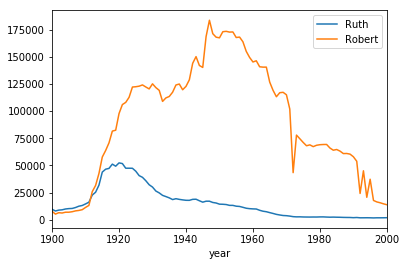

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

DATA_DIR = r'.\names'

# Загрузка данных
years = range(1900, 2001)
df = pd.DataFrame(columns=['name', 'sex', 'number', 'year'])
df['number'] = df['number'].astype('int64')
df['year'] = df['year'].astype('int64')
df = df.set_index('name')

for year in years:
    file_name = os.path.join(DATA_DIR, f'yob{year}.txt')
    cur_df = pd.read_csv(file_name, header=None, names=['name', 'sex', 'number'], index_col=0)
    df['number'] = df['number'].astype('int64')
    cur_df.loc[:, 'year'] = year
    df = df.append(cur_df)

# 1. Построить график изменения количества имен Ruth и Robert с 1900 по 2000

df_ruth = df.loc[['Ruth'], 'number':'year']
df_ruth = df_ruth.reset_index()
del df_ruth['name']
df_ruth.rename(columns={'number': 'Ruth'}, inplace=True)

df_robert = df.loc[['Robert'], 'number':'year']
df_robert = df_robert.reset_index()
del df_robert['name']
df_robert.rename(columns={'number': 'Robert'}, inplace=True)

df_plot = df_ruth.merge(df_robert, on='year')
df_plot = df_plot.groupby('year').aggregate(sum)
df_plot.plot()

plt.show()

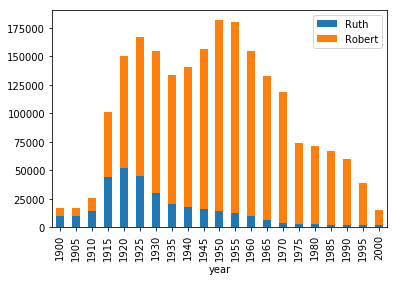

In [4]:
bins = list(range(1900, 2001, 5))
df_plot2 = df_plot.loc[bins]
df_plot2.plot(kind='bar', stacked=True)

plt.show()

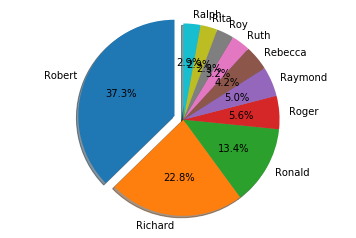

In [6]:
# 3. Построить круговую диаграмму по количеству употреблений для ТОП-10 популярных имен, начинающихся на R, за 1950 год.
ds_r = df[df.year == 1950]['number']
names_r = [name for name in ds_r.index if name.startswith('R')]
ds_r = ds_r.loc[names_r]
ds_r = ds_r.groupby(['name']).aggregate(sum)
ds_r = ds_r.sort_values(ascending=False)
top10_ds_r = ds_r[0:10]
labels = top10_ds_r.index
sizes = top10_ds_r.values
explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0) 

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
         shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

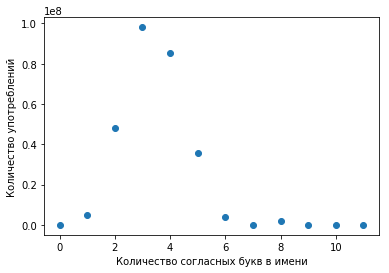

In [3]:
# 4 Построить точечную диаграмму по количеству согласных букв в именах и частоте употребления за 100 лет.
# Т.е. необходимо сложить всю статистику с 1900 до 2000, сгруппировать по именам,
# посчитать количество согласных букв в каждом имени и вывести на график отношение
# "Количество согласных букв в имени" : "Количество употреблений".
df_cons = df.copy()
df_cons['number_of_consonants'] = 0
df_cons = df_cons[['number_of_consonants', 'number']]
df_cons = df_cons.groupby('name').aggregate(sum)
df_cons = df_cons.reset_index()

def oount_consonants(cur_df):
    ds_word = cur_df['name'].lower()
    return sum(1 for letter in ds_word if letter not in 'aeiouy')

df_cons.loc[:, 'number_of_consonants'] = df_cons.apply(oount_consonants, axis=1)
df_cons = df_cons.groupby('number_of_consonants').aggregate(sum)

plt.scatter(df_cons.index, df_cons.values)
plt.xlabel('Количество согласных букв в имени')
plt.ylabel('Количество употреблений')
plt.show()